# Importing Library

In [10]:
# Importing library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Check library version
print("---Library version---", end = '\n\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 122)

mpl.font_manager.fontManager.addfont("C:\\Users\\theer\\Desktop\\Machine Learning\\fonts\\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')


print("---Working Directory---", end = '\n\n')
print('Working Directory: ', os.getcwd(), end='\n')
print('List Directory:', os.listdir(os.getcwd()))

---Library version---

pandas version:  2.2.0
numpy version:  1.26.3
seaborn version:  0.13.1
matplotlib version:  3.8.2

---Working Directory---

Working Directory:  C:\Users\theer\Desktop\Machine Learning\Machine Learning Model\Unsupervised Learning\K-means
List Directory: ['.ipynb_checkpoints', 'Kmeans Iris.ipynb']


# Importing Data

In [58]:
data = pd.read_csv(filepath_or_buffer = r"C:\Users\theer\Desktop\Machine Learning\Data\Iris.csv")
with pd.option_context('display.max_rows', 122):
    display(data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [59]:
# Get unique target values
unique_targets = data['target'].unique()

# Define colors for each target
colors = ['red', 'blue', 'green'][:len(unique_targets)]

# Create color_map dictionary
color_map = {target: color for target, color in zip(unique_targets, colors)}

print("color_map =", color_map)

color_map = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}


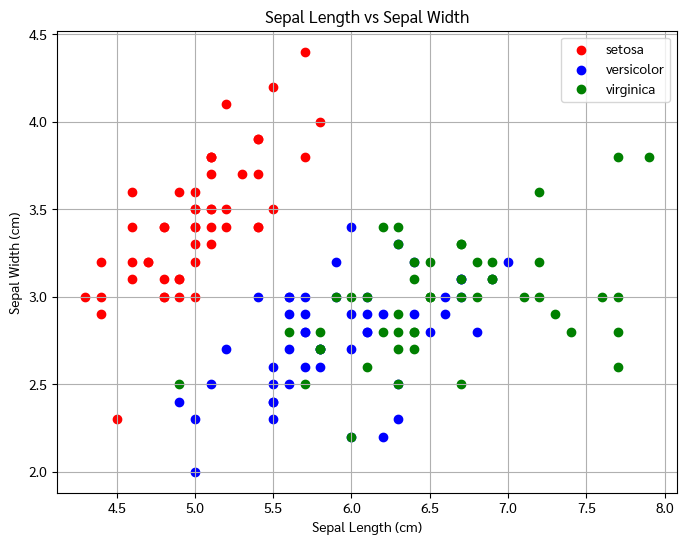

In [60]:
# Create scatter plot
plt.figure(figsize=(8, 6))
for target, color in color_map.items():
    plt.scatter(data[data['target'] == target]['sepal length (cm)'],
                data[data['target'] == target]['sepal width (cm)'],
                c=color, label=target)

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


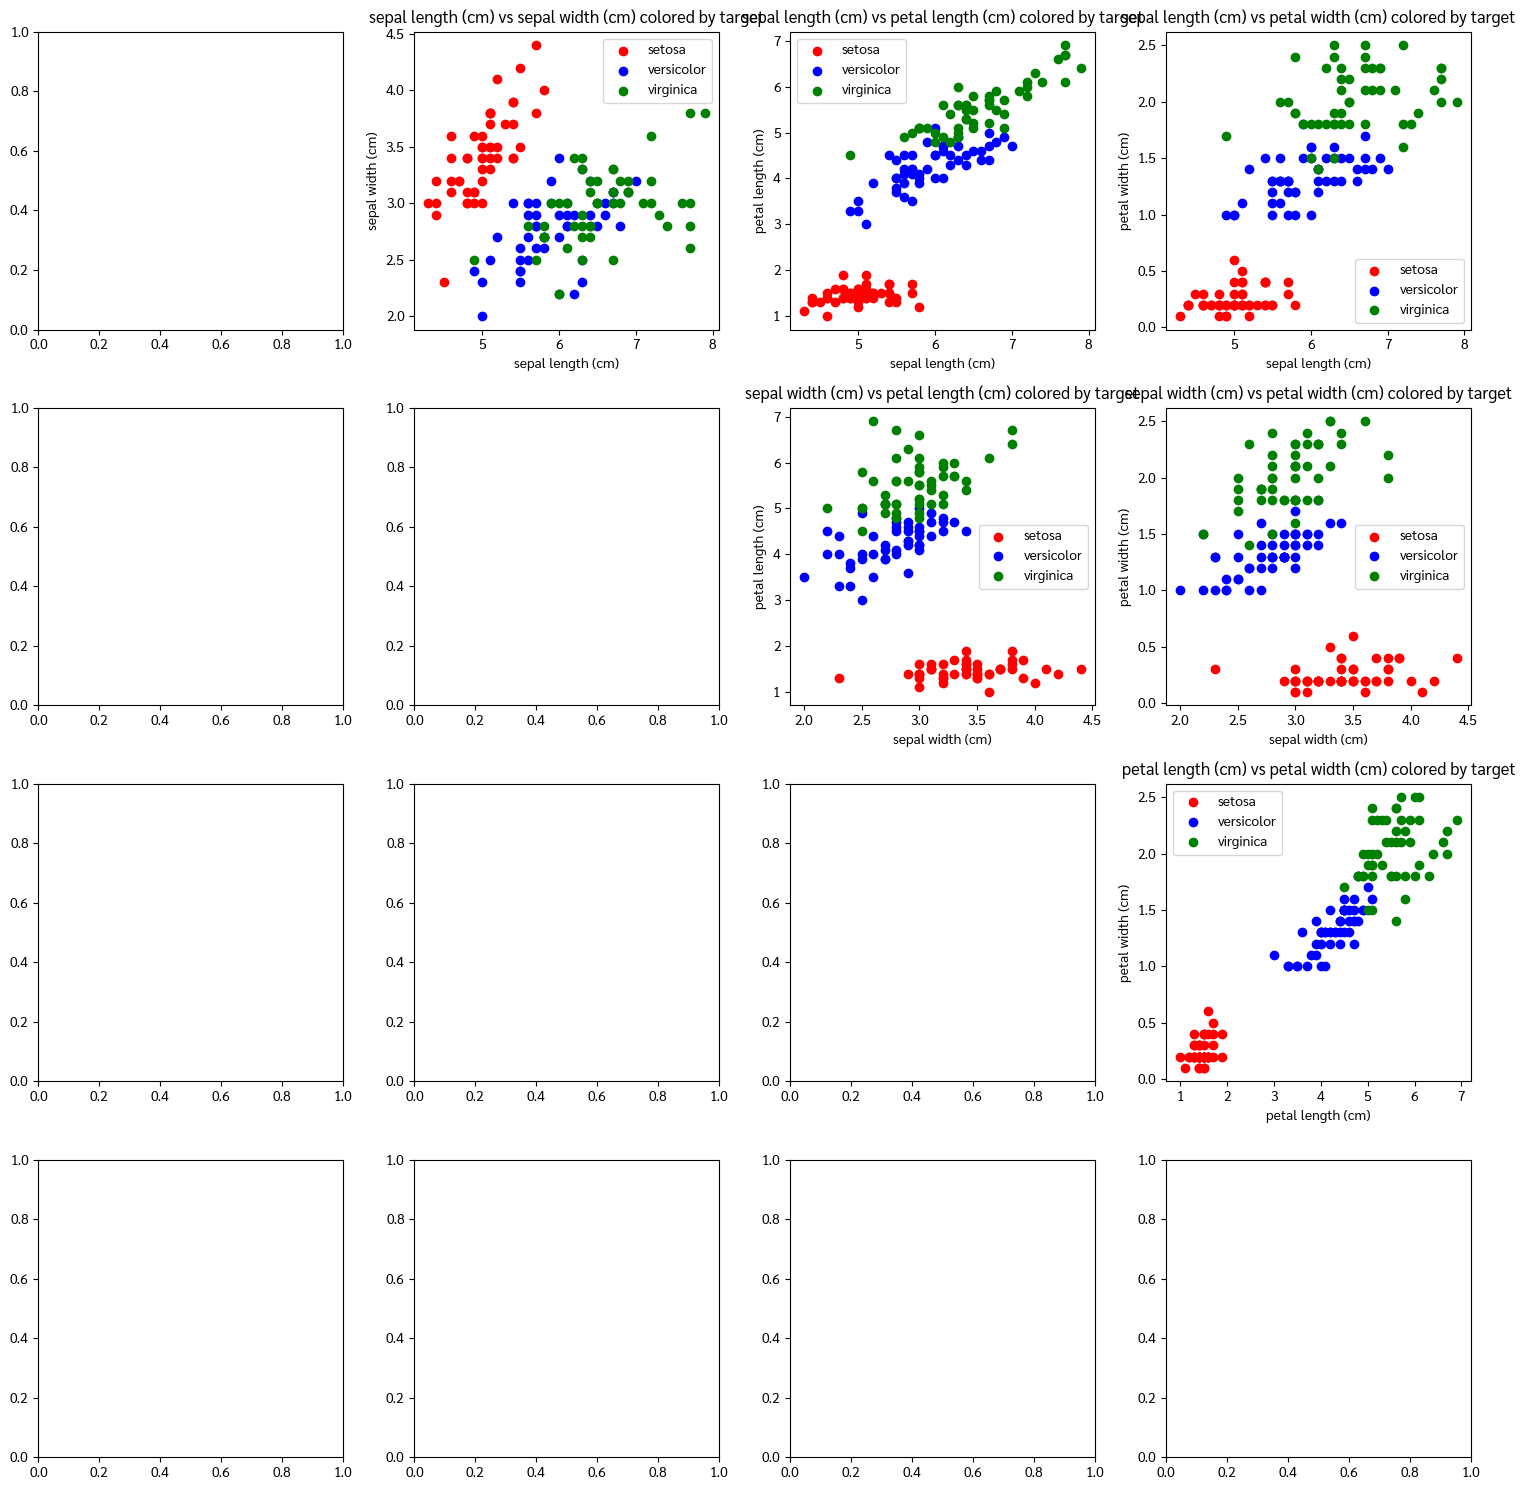

In [62]:
# Determine number of rows and columns for subplots
num_features = len(data.columns[:-1])
num_rows = num_columns = num_features
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Iterate over each pair of feature columns
for i, column1 in enumerate(data.columns[:-1]):
    for j, column2 in enumerate(data.columns[:-1]):
        ax = axes[i, j]
        if i < j:  # to avoid plotting the same pair twice
            # Scatter plot for each target type
            for target, color in color_map.items():
                target_data = data[data['target'] == target]
                ax.scatter(target_data[column1], target_data[column2], color=color, label=target)
            
            ax.set_xlabel(column1)
            ax.set_ylabel(column2)
            ax.set_title(f'{column1} vs {column2} colored by target')
            ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

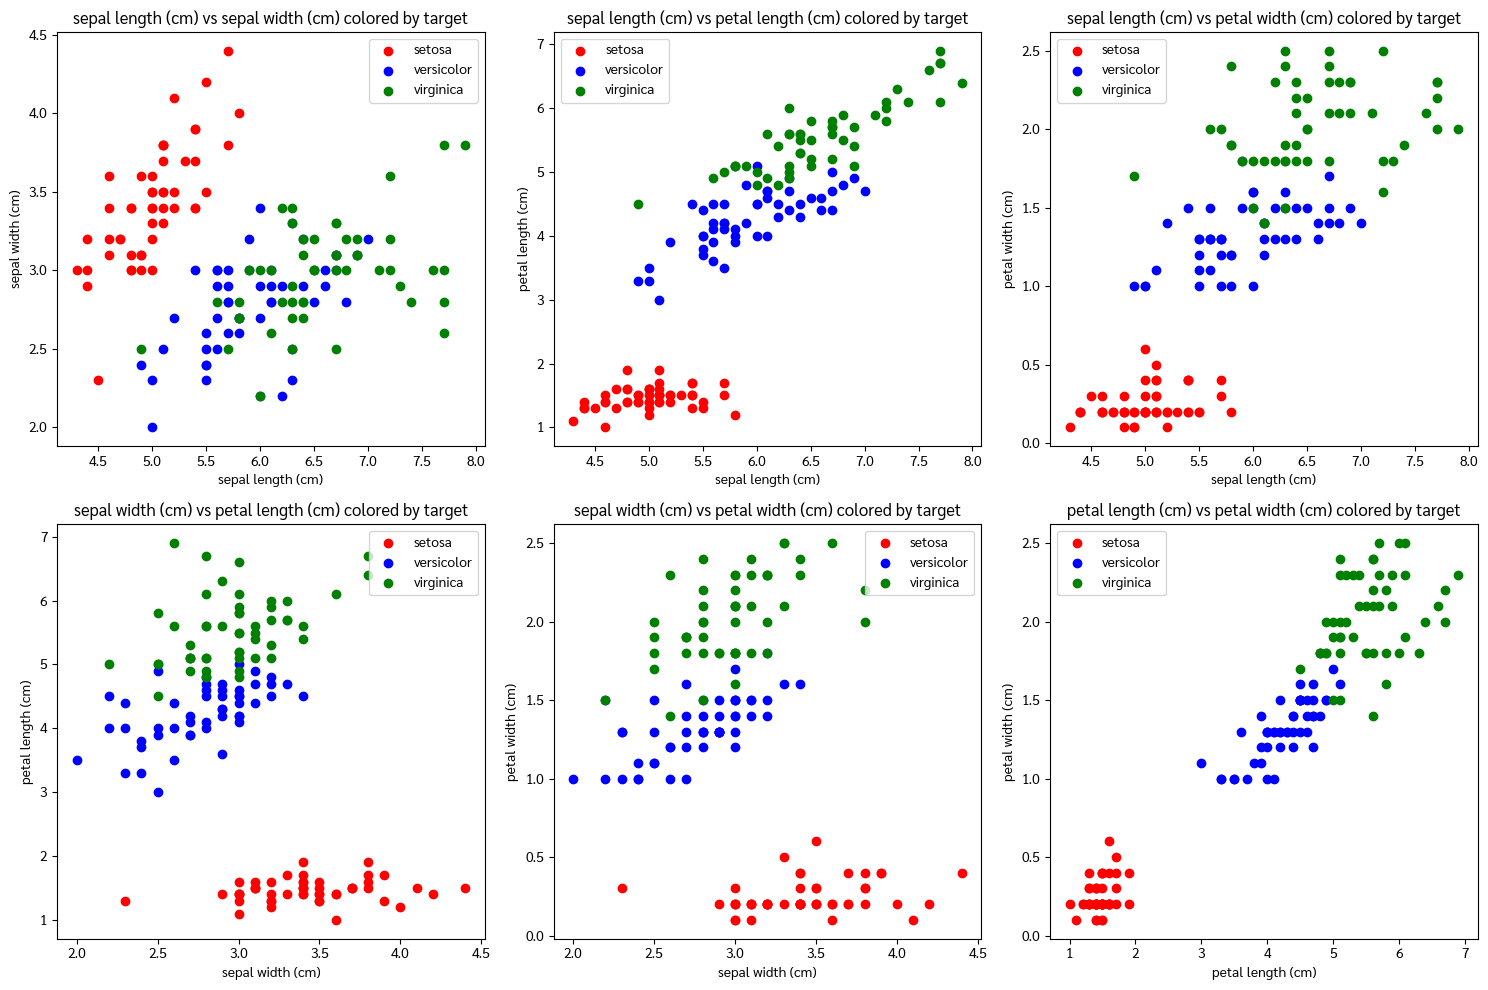

In [63]:
import matplotlib.pyplot as plt

# Determine number of rows and columns for subplots
num_rows = 2
num_columns = 3
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each pair of feature columns
for idx, (column1, column2) in enumerate([('sepal length (cm)', 'sepal width (cm)'),
                                           ('sepal length (cm)', 'petal length (cm)'),
                                           ('sepal length (cm)', 'petal width (cm)'),
                                           ('sepal width (cm)', 'petal length (cm)'),
                                           ('sepal width (cm)', 'petal width (cm)'),
                                           ('petal length (cm)', 'petal width (cm)')]):
    ax = axes[idx]
    # Scatter plot for each target type
    for target, color in color_map.items():
        target_data = data[data['target'] == target]
        ax.scatter(target_data[column1], target_data[column2], color=color, label=target)
    
    ax.set_xlabel(column1)
    ax.set_ylabel(column2)
    ax.set_title(f'{column1} vs {column2} colored by target')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


# Model Development

In [32]:
Km = KMeans(n_clusters = 3); Km

KMeans(n_clusters=3)

In [33]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [35]:
y_predicted = Km.fit_predict(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [36]:
data['cluster'] = y_predicted

In [37]:
data['cluster'].unique()

array([1, 0, 2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


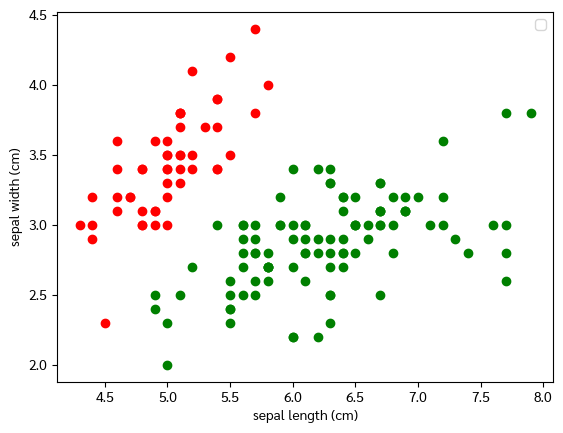

In [38]:
df1 = data[data['cluster'] == 0]
df2 = data[data['cluster'] == 1]
df3 = data[data['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'red')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color = 'green')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()